In [30]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets


import seaborn as sns  

import tensorflow as tf
from tensorflow import keras
from keras import layers, Model, optimizers, regularizers
from keras.utils import np_utils
#from keras.datasets import mnist
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline


In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


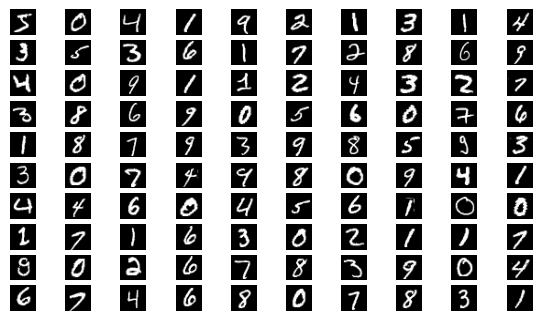

In [9]:
plt.figure(figsize=(7, 4), dpi=100)
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

C:\Users\bahas\Anaconda3\envs\Python et R\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


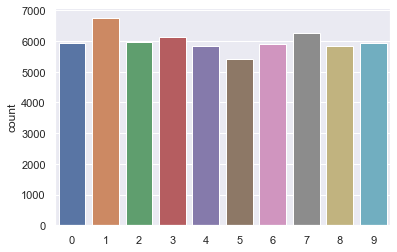

In [10]:
# Visualisation de la répartition des labels
sns.set()
ax = sns.countplot(y_train)

C:\Users\bahas\Anaconda3\envs\Python et R\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


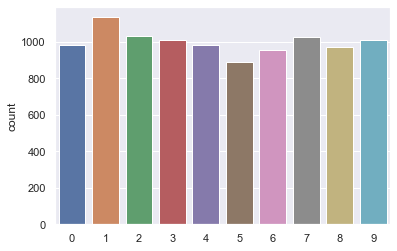

In [12]:
# Visualisation de la répartition des labels
sns.set()
ax = sns.countplot(y_test)

6. Explorez et testez différentes combinaisons d’architectures et d'hyper-paramètres du PMC. Prenez soin de comparer vos modèles et notez les meilleurs résultats.

In [14]:
model = Sequential()

model.add(Dense(10, input_shape=(784,)))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# Impression d'une description du réseau
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 8,175
Trainable params: 8,175
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model1 = model.fit(X_train, y_train, epochs=50, batch_size= 32 , validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0498 - accuracy: 0.7829 - val_loss: 0.5113 - val_accuracy: 0.8875
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4249 - accuracy: 0.8949 - val_loss: 0.3493 - val_accuracy: 0.9061
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.9092 - val_loss: 0.3008 - val_accuracy: 0.9142
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2899 - accuracy: 0.9189 - val_loss: 0.2761 - val_accuracy: 0.9203
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9247 - val_loss: 0.2638 - val_accuracy: 0.9239
Epoch 6/50
1875/1875 [==============================] - 2s 887us/step - loss: 0.2497 - accuracy: 0.9282 - val_loss: 0.2477 - val_accuracy: 0.9276
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2377 - accuracy: 0.9318 - val_loss: 0.2447 - val_accurac

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 905us/step - loss: 0.2308 - accuracy: 0.9327


[0.23078952729701996, 0.932699978351593]

Text(66.5, 0.5, 'Truth')

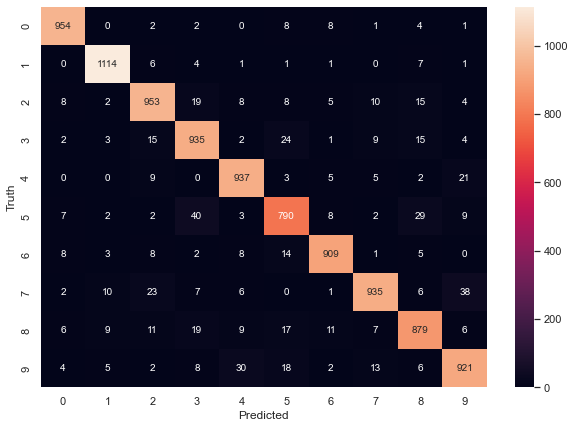

In [18]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

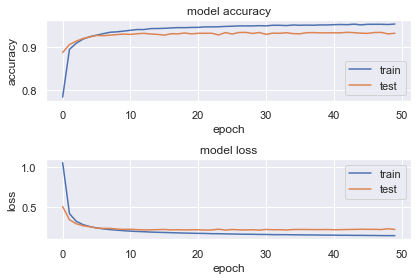

In [19]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

7. Après l’utilisation d’une couche dense, les données sont transformées. Cela à souvent pour effet de produire des valeurs totalement dispersées. Remédiez à ce problème en ajoutant une couche de normalisation.

In [20]:
model = Sequential()

model.add(Dense(100, input_shape=(784,)))
#model.add(BatchNormalization())
#layer = Normalization()
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='sigmoid'))
#model.add(BatchNormalization())

# Impression d'une description du réseau
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                1515      
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
Total params: 80,235
Trainable params: 80,205
Non-trainable params: 30
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model2 = model.fit(X_train, y_train, epochs=50, batch_size= 32 , validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6814 - accuracy: 0.8542 - val_loss: 0.2843 - val_accuracy: 0.9197
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9163 - val_loss: 0.2420 - val_accuracy: 0.9279
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2534 - accuracy: 0.9259 - val_loss: 0.2249 - val_accuracy: 0.9350
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2322 - accuracy: 0.9319 - val_loss: 0.1960 - val_accuracy: 0.9403
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2188 - accuracy: 0.9356 - val_loss: 0.2269 - val_accuracy: 0.9311
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2084 - accuracy: 0.9384 - val_loss: 0.1936 - val_accuracy: 0.9452
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2049 - accuracy: 0.9398 - val_loss: 0.1911 - val_accuracy:

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 883us/step - loss: 0.1729 - accuracy: 0.9518


[0.17292849719524384, 0.9517999887466431]

Text(66.5, 0.5, 'Truth')

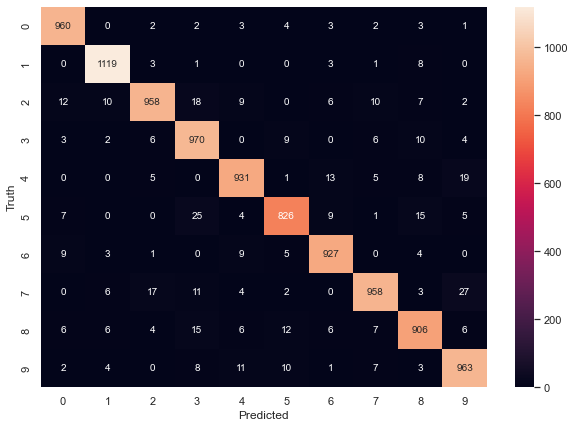

In [24]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


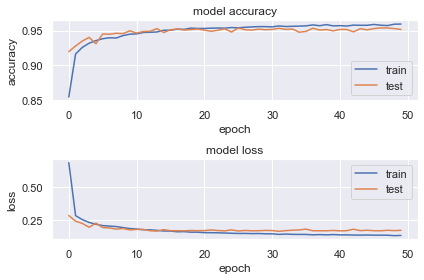

In [25]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [48]:
model = Sequential()

model.add(Dense(10, input_shape=(784,)))
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.01))
model.add(Dense(10, activation='sigmoid'))

# Impression d'une description du réseau
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                165       
_________________________________________________________________
batch_normalization_4 (Batch (None, 15)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                160       
Total params: 8,235
Trainable params: 8,205
Non-trainable params: 30
_________________________________________________________________


In [49]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model2 = model.fit(X_train, y_train, epochs=50, batch_size= 32 , validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7835 - accuracy: 0.8112 - val_loss: 0.2989 - val_accuracy: 0.9142
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3305 - accuracy: 0.9051 - val_loss: 0.2590 - val_accuracy: 0.9240
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2978 - accuracy: 0.9128 - val_loss: 0.2650 - val_accuracy: 0.9227
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2825 - accuracy: 0.9169 - val_loss: 0.2356 - val_accuracy: 0.9298
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2699 - accuracy: 0.9202 - val_loss: 0.2235 - val_accuracy: 0.9341
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9229 - val_loss: 0.2259 - val_accuracy: 0.9320
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2547 - accuracy: 0.9243 - val_loss: 0.2213 - val_accuracy:

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.1845 - accuracy: 0.9470


[0.1845380663871765, 0.9470000267028809]

Text(66.5, 0.5, 'Truth')

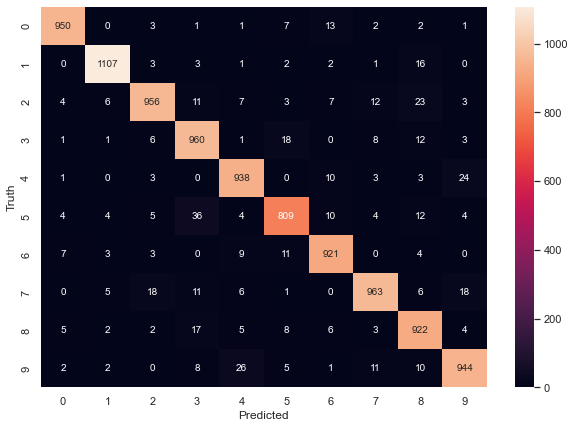

In [52]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

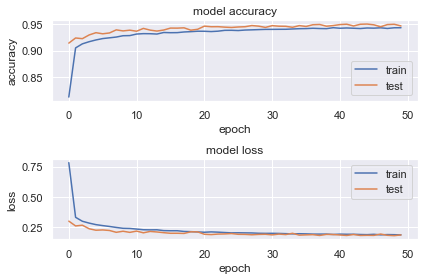

In [53]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

8. Surveillez le surapprentissage de vos modèles en visualisant la loss en fonction des epochs. S’il y a du surapprentissage, utilisez des couches de régularisation.

In [54]:
model = Sequential()

model.add(Dense(10, input_shape=(784,)))
model.add(layers.Dropout(0.005))
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.005))
model.add(Dense(10, activation='sigmoid'))

# Impression d'une description du réseau
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 15)                165       
_________________________________________________________________
batch_normalization_5 (Batch (None, 15)                60        
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                160       
Total params: 8,235
Trainable params: 8,205
Non-trainable params: 30
___________________________________________________

In [58]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=5)
tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="auto")

# Fit the model
model3=model.fit(X_train, y_train, epochs=30, validation_split=0.3, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])

Epoch 1/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2028 - accuracy: 0.9383 - val_loss: 0.2234 - val_accuracy: 0.9344
Epoch 2/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2067 - accuracy: 0.9364 - val_loss: 0.2239 - val_accuracy: 0.9355
Epoch 3/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2041 - accuracy: 0.9370 - val_loss: 0.2214 - val_accuracy: 0.9354
Epoch 4/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2042 - accuracy: 0.9376 - val_loss: 0.2233 - val_accuracy: 0.9343
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2025 - accuracy: 0.9384 - val_loss: 0.2238 - val_accuracy: 0.9342
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2019 - accuracy: 0.9371 - val_loss: 0.2226 - val_accuracy: 0.9360
Epoch 7/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2014 - accuracy: 0.9391 - val_loss: 0.2151 - val_accuracy:

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 832us/step - loss: 0.2104 - accuracy: 0.9392


[0.21044324338436127, 0.9391999840736389]

Text(66.5, 0.5, 'Truth')

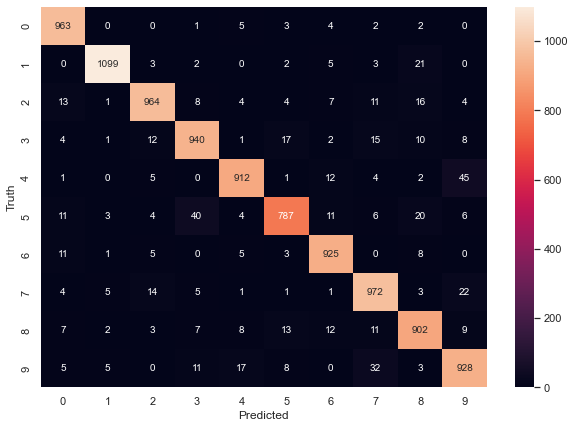

In [60]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

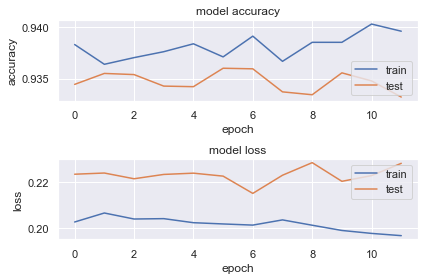

In [62]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model3.history['accuracy'])
plt.plot(model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model3.history['loss'])
plt.plot(model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()